In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from diagnostics import lm_plots

%matplotlib inline

line_kw = {'color':'red', 'alpha':0.5}
scatter_kw = {'marker':'o', 'edgecolors':'black', 'color':'white'}

## Exercise 14

This problem focuses on the collinearity problem.

In [2]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + (np.random.normal(size=100) / 10)
y = 2 + (2 * x1) + (0.3 * x2) + np.random.normal(size=100)

__(a) The last line corresponds to creating a linear model in which `y` is a function of `x1` and `x2`. Write out the form of the linear model. What are the regression coefficients?__

In [3]:
B0 = 2
B1 = 2
B2 = 0.3

__(b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.__

In [4]:
X = pd.DataFrame({'x1': x1, 'x2': x2})
X[['x1', 'x2']].corr()

,x1,x2
x1,1.00000,0.83906
x2,0.83906,1.00000


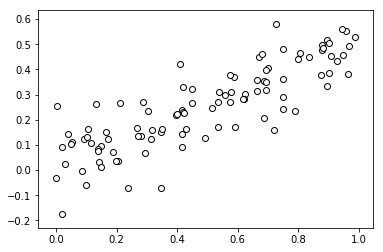

In [5]:
plt.scatter(X['x1'], X['x2'], **scatter_kw);

__(c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are βˆ0, βˆ1, and βˆ2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?__

In [6]:
X = pd.DataFrame({'x1': x1, 'x2': x2})
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.params

const    2.189284
x1       0.704629
x2       2.502405
dtype: float64

`B^0` is pretty close to the real value. Both `B^1` and `B^2` are not (in fact they look inversed).

In [7]:
model.conf_int()

,0,1
const,1.795010,2.583559
x1,-0.559175,1.968432
x2,0.238962,4.765848


- You cannot reject `H0: B1 == 0`

- You can reject `H0 B2 == 0`

__(d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?__

In [8]:
X = pd.DataFrame({'x1': x1})
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.conf_int()

,0,1
const,1.850493,2.646669
x1,1.176264,2.577709


- Yes, we can reject `H0: B1 == 0`

__(e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 :β1 =0?__

In [9]:
X = pd.DataFrame({'x2': x2})
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.conf_int()

,0,1
const,1.895349,2.635703
x2,2.328623,4.793930


- Yes, we can reject `H0: B1 == 0`

__(f)  Do the results obtained in (c)–(e) contradict each other? Explain your answer.__

Yes, because of multicolinearity of x1 and x2, the estimated coefficients have large SE that make them useless for induction.

__(g) Now suppose we obtain one additional observation, which was unfortunately mismeasured.__

In [10]:
x1a = np.append(x1, [0.1])
x2a = np.append(x2, [0.8])
ya = np.append(y, 6)

__Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.__

In [11]:
# first, both variables model
X = pd.DataFrame({'x1': x1a, 'x2': x2a})
X = sm.add_constant(X)
model_1 = sm.OLS(ya, X).fit()
model_1.conf_int()

,0,1
const,1.804222,2.594928
x1,-0.812313,1.252365
x2,1.669677,5.208698


In [12]:
# x1 model
X = pd.DataFrame({'x1': x1a})
X = sm.add_constant(X)
model_2 = sm.OLS(ya, X).fit()
model_2.conf_int()

,0,1
const,1.945334,2.771317
x1,0.992053,2.452992


In [13]:
# x2 model
X = pd.DataFrame({'x2': x2a})
X = sm.add_constant(X)
model_3 = sm.OLS(ya, X).fit()
model_3.conf_int()

,0,1
const,1.872020,2.594234
x2,2.553881,4.889332


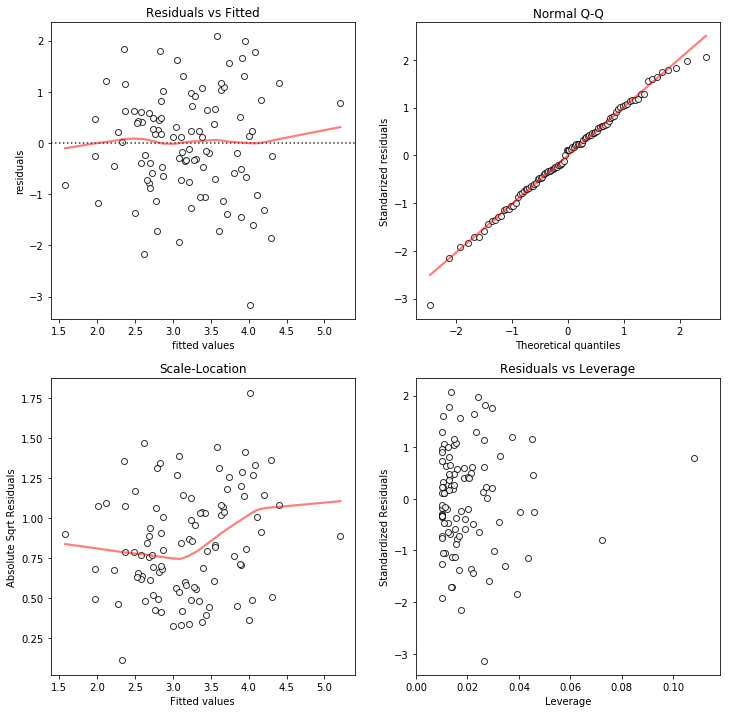

In [21]:
lm_plots(model_3, ya)

- It's a high leverage point in the model with both `x1` and `x2` (`model_1`)
- It's an outlier in model with `x1` only (`model_2`)
- It's a high leverage point in model with `x2` only (`model_3`)

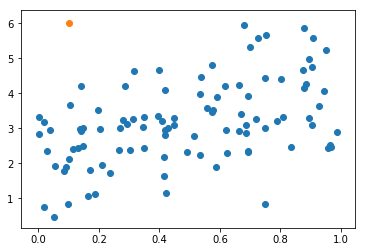

In [86]:
plt.scatter(x1, y)
plt.scatter(0.1, 6);

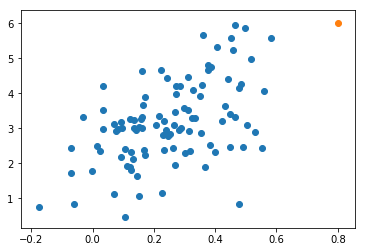

In [88]:
plt.scatter(x2, y)
plt.scatter(0.8, 6);

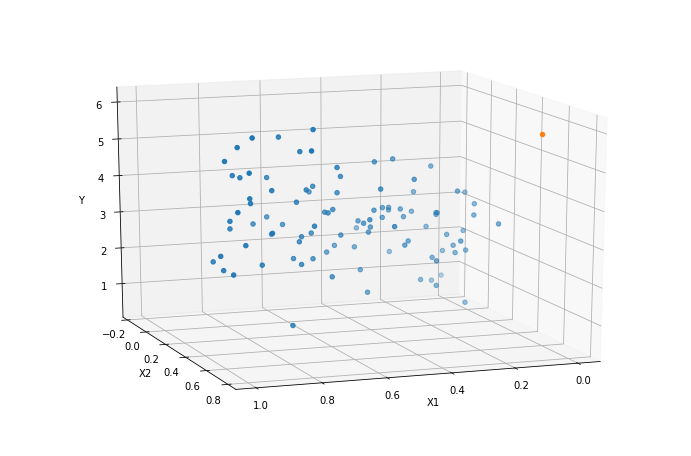

In [89]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.scatter(x1, x2, y)
ax.scatter(0.1, 0.8, 6)
ax.view_init(15, 70);